In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv('../data/processed_data/df_delay.csv')
df = df.rename(columns={
    'Min Gap': 'Min_Gap',
    'Min Delay':'Min_Delay'
})
df.head(3)

,Date,Time,Day,Station,Code,Min_Delay,Min_Gap,Bound,Line,Year,Month,Category
0,2024-01-01,00:01,Monday,GO PROTOCOL - DANFORTH,MUO,0.0,0.0,NaN,BD,2024,1,Miscellaneous
1,2024-01-01,00:44,Monday,VAUGHAN MC STATION,MUPAA,0.0,0.0,S,YU,2024,1,Door/Passenger/Platform Incidents
2,2024-01-01,00:48,Monday,BLOOR STATION,SUO,0.0,0.0,S,YU,2024,1,Security/Policing


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M")
# Names to months
month_dict = {
    1:  'January',
    2:  'February',
    3:  'March',
    4:  'April',
    5:  'May',
    6:  'June',
    7:  'July',
    8:  'August',
    9:  'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

#df['Month'] = df['Month'].replace(month_dict)
df['Month_name'] = df['Month'].map(month_dict)

In [7]:
df["Hour"] = df["Time"].dt.hour

In [8]:
df.head(3)

,Date,Time,Day,Station,Code,Min_Delay,Min_Gap,Bound,Line,Year,Month,Category,Month_name,Hour
0,2024-01-01,1900-01-01 00:01:00,Monday,GO PROTOCOL - DANFORTH,MUO,0.0,0.0,NaN,BD,2024,1,Miscellaneous,January,0
1,2024-01-01,1900-01-01 00:44:00,Monday,VAUGHAN MC STATION,MUPAA,0.0,0.0,S,YU,2024,1,Door/Passenger/Platform Incidents,January,0
2,2024-01-01,1900-01-01 00:48:00,Monday,BLOOR STATION,SUO,0.0,0.0,S,YU,2024,1,Security/Policing,January,0


In [9]:
# Divide the Data Frame in Delay and No_delay

df_delay = df[df['Min_Delay'] > 0]  # Contains rows where delay is greater than 0
df_0 = df[df['Min_Delay'] == 0]  # Contains rows where delay is exactly 0

In [10]:
delay_and_gap = smf.ols('Min_Delay ~ Min_Gap', data = df_delay).fit()
print(delay_and_gap.summary())

                            OLS Regression Results                            
Dep. Variable:              Min_Delay   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.315e+05
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:36:58   Log-Likelihood:                -28897.
No. Observations:               10141   AIC:                         5.780e+04
Df Residuals:                   10139   BIC:                         5.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2835      0.052    -63.517      0.0

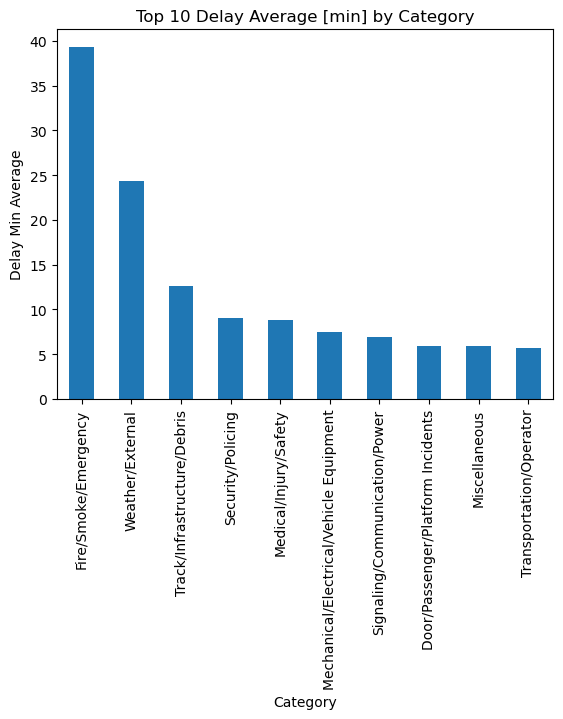

In [ ]:

delay_category_counts = df_delay.groupby("Category")["Min_Delay"].mean().sort_values(ascending=False).head(10)
plt.figure()
delay_category_counts.plot(kind="bar")
plt.title("Top 10 Delay Average [min] by Category")
plt.xlabel("Category")
plt.ylabel("Delay Min Average")
plt.show()

In [12]:
df_delay.groupby("Category")["Min_Delay"].mean().sort_values(ascending=False).head(10)

Category
Fire/Smoke/Emergency                       39.323529
Weather/External                           24.333333
Track/Infrastructure/Debris                12.641457
Security/Policing                           9.053774
Medical/Injury/Safety                       8.828392
Mechanical/Electrical/Vehicle Equipment     7.516324
Signaling/Communication/Power               6.962741
Door/Passenger/Platform Incidents           5.922247
Miscellaneous                               5.918675
Transportation/Operator                     5.657419
Name: Min_Delay, dtype: float64

In [13]:
print(df_delay.columns)


Index(['Date', 'Time', 'Day', 'Station', 'Code', 'Min_Delay', 'Min_Gap',
       'Bound', 'Line', 'Year', 'Month', 'Category', 'Month_name', 'Hour'],
      dtype='object')


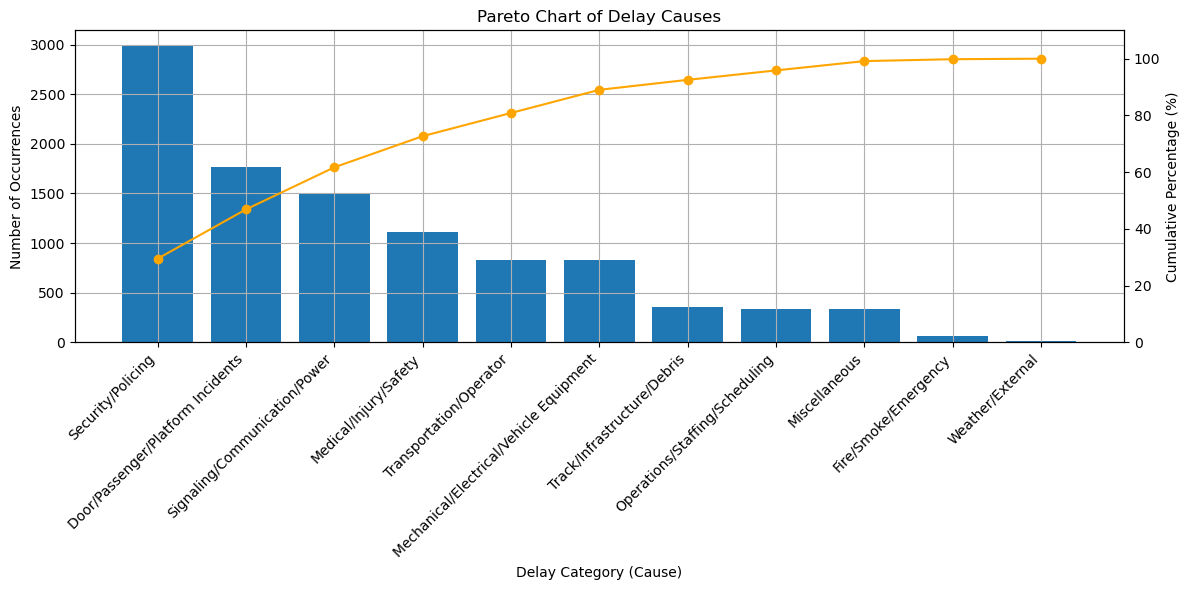

In [32]:

# Count how many times each category appears
category_counts = df_delay['Category'].value_counts().sort_values(ascending=False)

# Calculate the cumulative percentage of these counts
cumulative_percentage = category_counts.cumsum() / category_counts.sum() * 100

# Create a larger figure and axes to accommodate horizontal labels
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars
ax.bar(category_counts.index, category_counts.values)
ax.set_xlabel("Delay Category (Cause)")
ax.set_ylabel("Number of Occurrences")
ax.grid()
# Plot the cumulative percentage on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(category_counts.index, cumulative_percentage, marker='o', color='orange')
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim([0, 110])

# Make x-axis text horizontal
plt.xticks(rotation=45, ha='center') 
labels = ax.get_xticklabels() 
for lbl in labels:
    lbl.set_rotation(45)   # or 90 if you prefer vertical
    lbl.set_ha('right')
# Add a title
plt.title("Pareto Chart of Delay Causes")

# Adjust layout so labels/titles don’t get clipped
plt.tight_layout()

# Display the chart
plt.show()



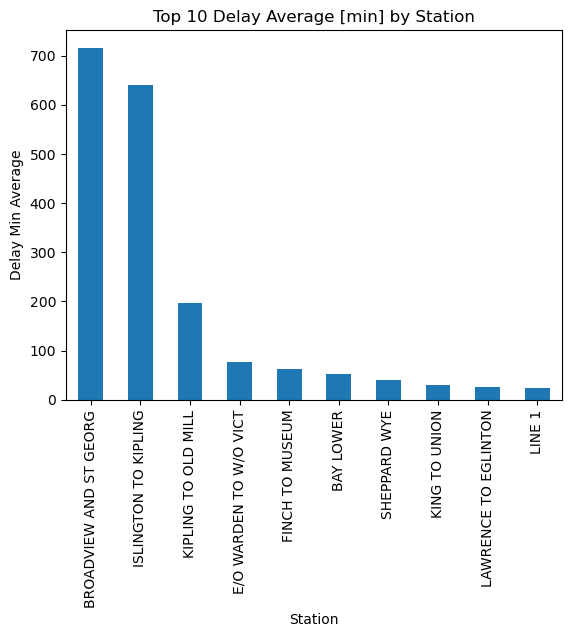

In [ ]:

delay_sation_counts = df_delay.groupby("Station")["Min_Delay"].mean().sort_values(ascending=False).head(10)
plt.figure()
delay_sation_counts.plot(kind="bar")
plt.title("Top 10 Delay Average [min] by Station")
plt.xlabel("Station")
plt.ylabel("Delay Min Average")
plt.show()